<a href="https://colab.research.google.com/github/YaswanthPothineni/Airline-Passenger-Satisfaction-using-Random-Forest-Classifier/blob/main/Airline_Passenger_Satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [3]:
train_df=pd.read_csv('/content/train.csv')
train_df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
train_df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

**Exploratory Data Analysis(EDA)**

In [5]:
train_df.info

<bound method DataFrame.info of         Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0                0   70172    Male     Loyal Customer   13  Personal Travel   
1                1    5047    Male  disloyal Customer   25  Business travel   
2                2  110028  Female     Loyal Customer   26  Business travel   
3                3   24026  Female     Loyal Customer   25  Business travel   
4                4  119299    Male     Loyal Customer   61  Business travel   
...            ...     ...     ...                ...  ...              ...   
103899      103899   94171  Female  disloyal Customer   23  Business travel   
103900      103900   73097    Male     Loyal Customer   49  Business travel   
103901      103901   68825    Male  disloyal Customer   30  Business travel   
103902      103902   54173  Female  disloyal Customer   22  Business travel   
103903      103903   62567    Male     Loyal Customer   27  Business travel   

           Class  F

Dealing with null values

In [6]:
train_df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [8]:
train_df['Arrival Delay in Minutes']=train_df['Arrival Delay in Minutes'].fillna(0)

In [9]:
train_df['Arrival Delay in Minutes'].isnull().sum()

0

In [10]:
train_df.drop(columns=['Unnamed: 0','id'],axis=1,inplace=True)

<Axes: title={'center': 'Count Of Male and Female Passanger'}>

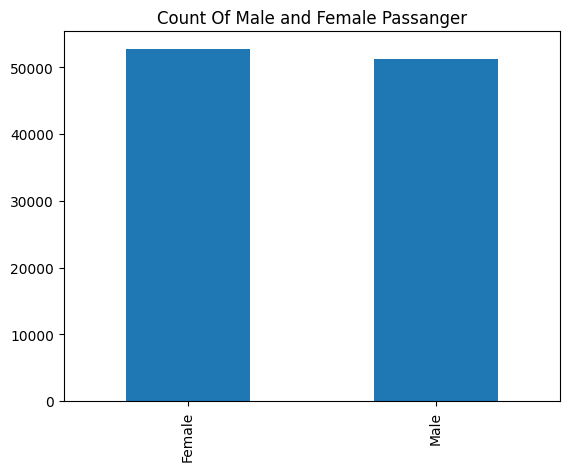

In [12]:
train_df['Gender'].value_counts().plot(kind='bar',title='Count Of Male and Female Passanger')

<Axes: title={'center': 'Count Of neutral or dissatisfied and satisfied'}>

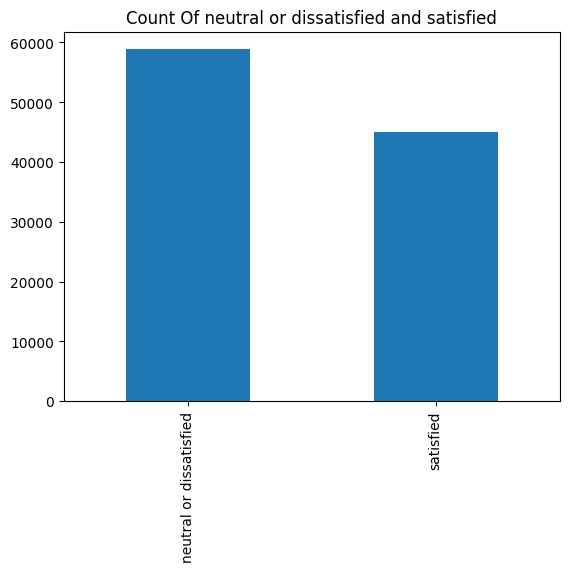

In [94]:
train_df['satisfaction'].value_counts().plot(kind='bar',title='Count Of neutral or dissatisfied and satisfied')

<Axes: xlabel='satisfaction', ylabel='count'>

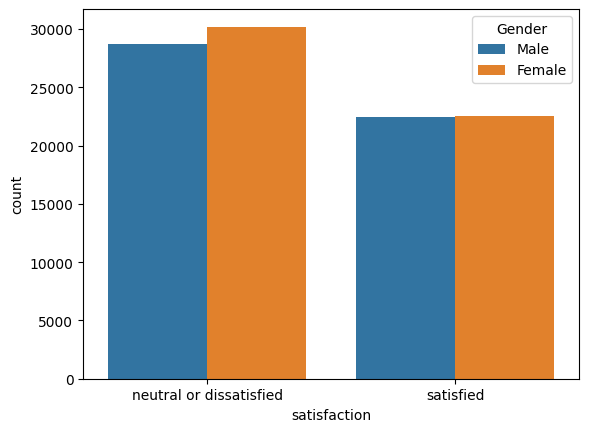

In [15]:
sns.countplot(data=train_df, x='satisfaction', hue='Gender')

<Axes: ylabel='satisfaction'>

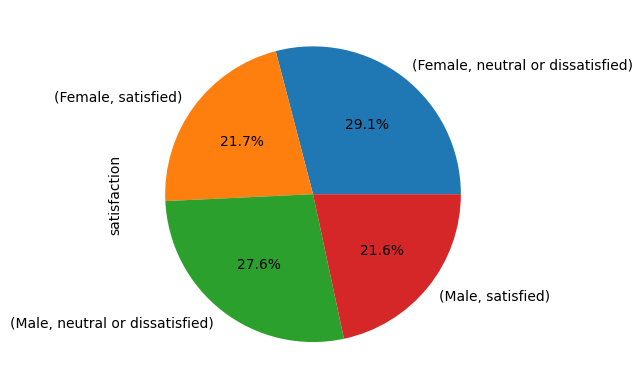

In [16]:
train_df.groupby('Gender')['satisfaction'].value_counts().plot.pie(autopct='%1.1f%%')

<Axes: xlabel='Class', ylabel='count'>

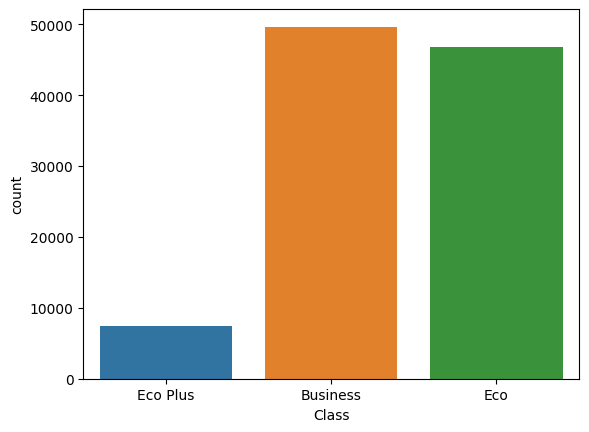

In [17]:
sns.countplot(data=train_df, x='Class')

<Axes: xlabel='Class', ylabel='Count'>

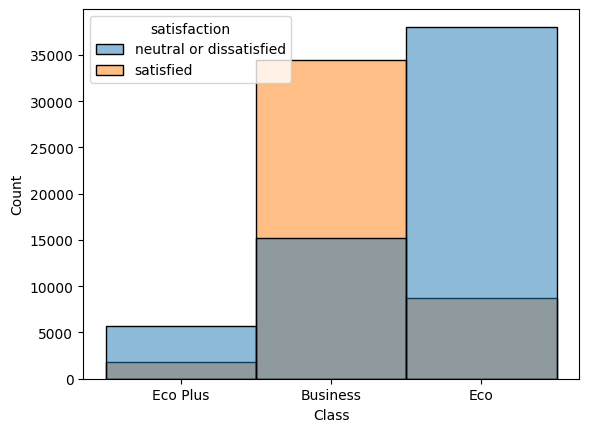

In [18]:
sns.histplot(data=train_df, x='Class',hue='satisfaction')

<Axes: >

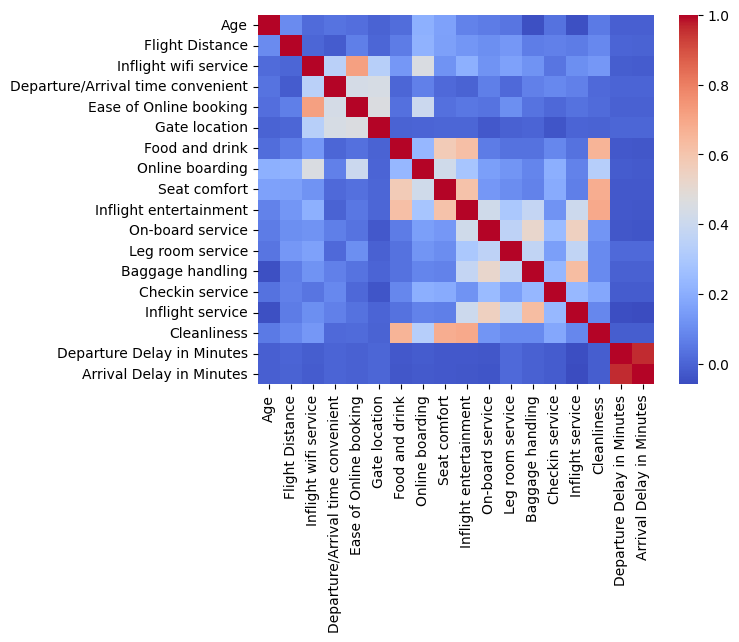

In [27]:
corr_matrix=train_df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm')

<Axes: xlabel='Age', ylabel='Count'>

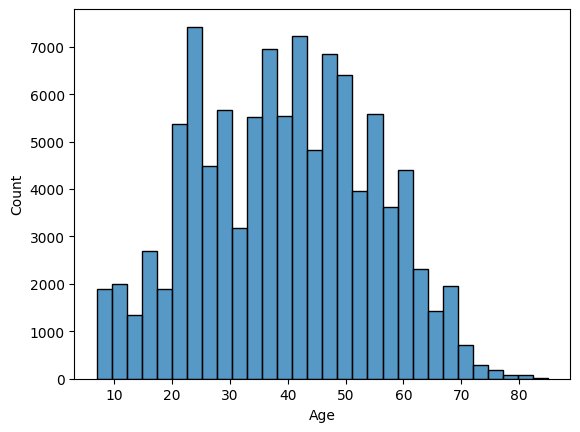

In [22]:
sns.histplot(train_df['Age'], bins=30)

<Axes: xlabel='satisfaction', ylabel='Flight Distance'>

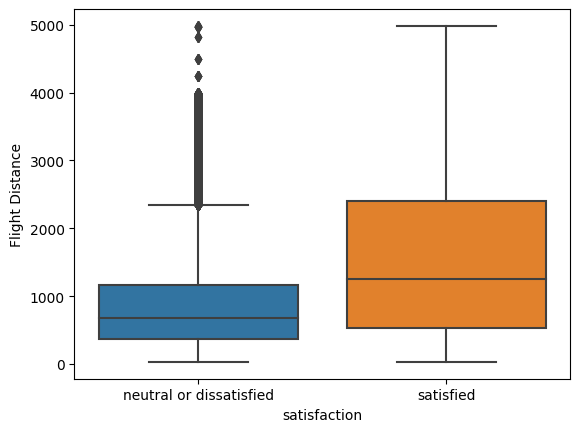

In [23]:
sns.boxplot(data=train_df, x='satisfaction', y='Flight Distance')

**Handing Missing data and EDA on Test data**

In [29]:
test_df=pd.read_csv('/content/test.csv')

In [30]:
test_df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [31]:
test_df.drop(['Unnamed: 0','id'],axis=1,inplace=True)

In [32]:
test_df.isnull().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [34]:
test_df['Arrival Delay in Minutes']=test_df['Arrival Delay in Minutes'].fillna(0)

In [35]:
test_df['Arrival Delay in Minutes'].isnull().sum()

0

([<matplotlib.patches.Wedge at 0x7e850f4adc30>,
 [Text(-0.20957359088360364, 1.0798513369923437, 'satisfied'),
  Text(0.22862573550938586, -1.178019640355284, 'neutral or dissatisfied')],
 [Text(-0.11431286775469288, 0.5890098201776419, '56.1%'),
  Text(0.1333650123804751, -0.6871781235405823, '43.9%')])

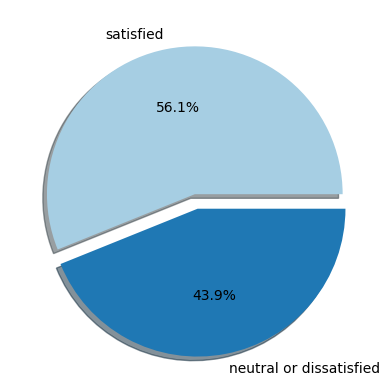

In [36]:
plt.pie(test_df['satisfaction'].value_counts(),autopct='%1.1f%%',labels=['satisfied', 'neutral or dissatisfied'], explode=[0, 0.1],colors=sns.color_palette('Paired'),shadow=True)

In [42]:
Train_df= pd.get_dummies(train_df, columns=['Gender','Type of Travel','Class','satisfaction','Customer Type'], prefix=None, drop_first=True)
Test_df= pd.get_dummies(test_df, columns=['Gender','Type of Travel','Class','satisfaction','Customer Type'], prefix=None, drop_first=True)

In [43]:
Train_df.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied,Customer Type_disloyal Customer
0,13,460,3,4,3,1,5,3,5,5,...,5,5,25,18.0,1,1,0,1,0,0
1,25,235,3,2,3,3,1,3,1,1,...,4,1,1,6.0,1,0,0,0,0,1
2,26,1142,2,2,2,2,5,5,5,5,...,4,5,0,0.0,0,0,0,0,1,0
3,25,562,2,5,5,5,2,2,2,2,...,4,2,11,9.0,0,0,0,0,0,0
4,61,214,3,3,3,3,4,5,5,3,...,3,3,0,0.0,1,0,0,0,1,0


In [44]:
Train_df.rename(columns={'satisfaction_satisfied': 'satisfaction'}, inplace=True)
Test_df.rename(columns={'satisfaction_satisfied': 'satisfaction'}, inplace=True)

In [45]:
Test_df.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction,Customer Type_disloyal Customer
0,52,160,5,4,3,4,3,4,3,5,...,5,5,50,44.0,0,0,1,0,1,0
1,36,2863,1,1,3,1,5,4,5,4,...,4,5,0,0.0,0,0,0,0,1,0
2,20,192,2,0,2,4,2,2,2,2,...,2,2,0,0.0,1,0,1,0,0,1
3,44,3377,0,0,0,2,3,4,4,1,...,1,4,0,6.0,1,0,0,0,1,0
4,49,1182,2,3,4,3,4,1,2,2,...,2,4,0,20.0,0,0,1,0,1,0


Lest see how each feature is correlated to satisfaction

<Axes: >

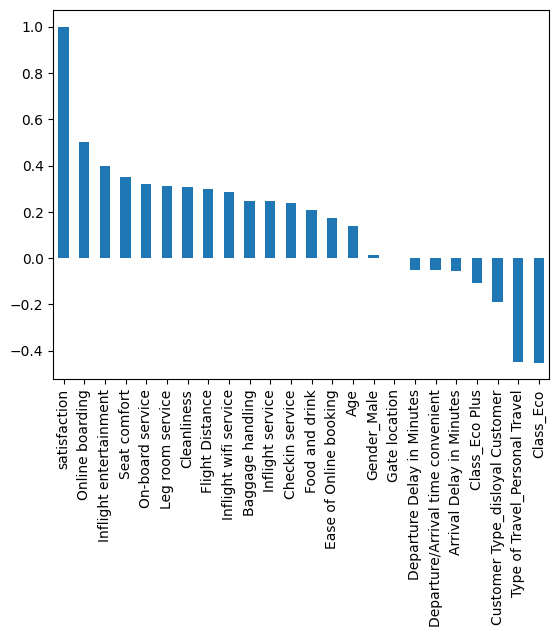

In [53]:
Train_df.corr()['satisfaction'].sort_values(ascending=False).plot(kind='bar')

In [54]:
X=Train_df.drop('satisfaction',axis=1)
y=Train_df['satisfaction']

In [56]:
X.shape

(103904, 23)

In [57]:
y.shape

(103904,)

**Model Building**

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
model = RandomForestClassifier(n_estimators=10,max_features='auto',random_state=101)

In [61]:
model.fit(X_train,y_train)

RandomForestClassifier(max_features='auto', n_estimators=10, random_state=101)

In [62]:
preds = model.predict(X_test)

In [64]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [65]:
confusion_matrix(y_test,preds)

array([[11521,   293],
       [  607,  8360]])

In [66]:
accuracy_score(y_test,preds)

0.956691208315288

**Feature Importance**

In [76]:
feature_importances_df = pd.DataFrame(data=model.feature_importances_, index=Train_df.drop('satisfaction', axis=1).columns, columns=['imp'])
feature_importances_df.sort_values(by='imp',ascending=False)

,imp
Online boarding,0.170147
Inflight wifi service,0.139832
Type of Travel_Personal Travel,0.123510
Class_Eco,0.076734
Customer Type_disloyal Customer,0.046125
Inflight entertainment,0.044327
Ease of Online booking,0.042256
Seat comfort,0.040691
On-board service,0.040161
Leg room service,0.039627


**Finding best number to use for n_estimators**

In [90]:
errors = []
misclassifications = []

for n in range(1,100):
    rfc = RandomForestClassifier( n_estimators=n,bootstrap=True,max_features= 2)
    rfc.fit(X_train,y_train)
    preds = rfc.predict(X_test)
    err = 1 - accuracy_score(preds,y_test)
    n_missed = np.sum(preds != y_test) # watch the video to understand this line!!
    errors.append(err)
    misclassifications.append(n_missed)

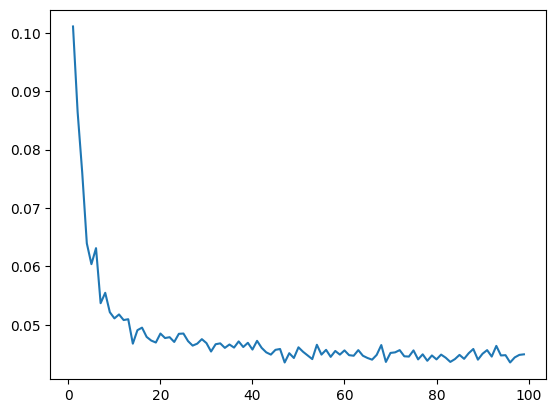

In [93]:
plt.plot(range(1,100),errors)

We can see that the error is becoming constant from 20 estimators to 100 estimators, we can use any number in between

**Lets see if using bootstraping or oob-score makes a difference**

In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
n_estimators=[10,20,50,100]
max_features= [2,3,4]
bootstrap = [True,False]
oob_score = [True,False]

In [81]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score}

In [82]:
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc,param_grid)

In [83]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [10, 20, 50, 100],
                         'oob_score': [True, False]})

In [84]:
grid.best_params_

{'bootstrap': False,
 'max_features': 4,
 'n_estimators': 100,
 'oob_score': False}

We can see that using bootstrap and oob_score does not make a difference

In [86]:
predictions =grid.predict(X_test)

In [87]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     11814
           1       0.97      0.94      0.96      8967

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



**Lets use this model on Test data**

In [89]:
X=Test_df.drop('satisfaction',axis=1)
y=Test_df['satisfaction']
y_pred = grid.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 96.17%
